In [1]:
import numpy as np
import pandas as pd
import openpyxl
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("df.xlsx", engine='openpyxl', sheet_name=2)

In [6]:
df.fillna(0, inplace=True)

In [8]:
df.head()

,Номер,ID,Должность,Месяц,1.Основна заплата,2.Награда при командировка,3.Клас просл.време,4.Добавка за отговорност,5.Доп. задачи,6.Целева награда,...,80.Нощен труд график,82.Месечен бонус,2002.Допълнителен отпуск,2004.Болничен осигурител,2015.Компенсация,2030.УЧЕНИЧЕСКИ ОТПУСК,2046.Платен отпуск 2020,2047.Платен отпуск 2021,2048.Платен отпуск 2022,ФРЗ
0,1,1833,"СПЕЦИАЛИСТ, ТРУД И РАБОТНА ЗАПЛАТА",Февраль,1750.0,0.0,0.00,0.0,45.29,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2651.29
1,2,281,КАСИЕР-СЧЕТОВОДИТЕЛ,Февраль,1080.0,0.0,0.00,0.0,0.00,1652.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3361.64
2,3,439,СЧЕТОВОДИТЕЛ,Февраль,1045.0,0.0,150.48,0.0,0.00,0.0,...,0.0,0.0,66.08,0.0,0.0,0.0,0.0,0.0,0.0,1485.56
3,4,2755,ФИНАНСОВ ДИРЕКТОР,Февраль,4940.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,379.6,0.0,7834.00
4,5,2147,СЧЕТОВОДИТЕЛ,Февраль,1300.0,0.0,0.00,0.0,0.00,1715.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3512.20


In [17]:
feature_names = df.columns[5:49]

In [18]:
feature_names

Index(['2.Награда при командировка', '3.Клас просл.време',
       '4.Добавка за отговорност', '5.Доп. задачи', '6.Целева награда',
       '7.Добавка за съвместяване', '12.Team leader', '15.Храна',
       '19.Изв.труд - събота', '20.Нощен труд', '25.Сума за транспорт',
       '26.Условия на труд за Втора категория',
       '30.Изв.труд-официален празник', '31.Доп.стимулиране',
       '32.Клас профес.опит', '33.Добавка за н-к отдел',
       '34.Индивидуална доп.сума', '35.Добавка за консултант',
       '36.Клас-специален', '37.Добавка за р-л сектор/участък/',
       '40.Клас специален - за над 15г.',
       '42.Др. доплащания-за позиция и доп.работа', '44.KPI',
       '48.Храна усл.на труд', '49.Подарък Рожден ден', '53.Доп.з. - неделя',
       '54.Мотивация производство', '56.Клас над 20 г.', '65.Мотивация',
       '70.Офиц.труд по график',
       '71.Изв.труд при сумирано изчисляване на работното време',
       '72.Храна по Наредба 11 дневни', '73.Храна по график',
       '74.Храна по 

In [19]:
data = {}
for element in feature_names:
    data[element] = df[element].sum()

In [143]:
len(feature_names)

44

In [20]:
sorted_tuples = sorted(data.items(), key=lambda item: item[1])
sorted_data = {k: v for k, v in sorted_tuples}

In [47]:
top_names = [
    '32.Клас профес.опит',
    '15.Храна',
    '2048.Платен отпуск 2022',
    '2047.Платен отпуск 2021',
    '6.Целева награда',
    '56.Клас над 20 г.',
    '44.KPI',
    '25.Сума за транспорт',
    '82.Месечен бонус',
    '2004.Болничен осигурител',
    '48.Храна усл.на труд',
    '19.Изв.труд - събота',
    '31.Доп.стимулиране',
    '3.Клас просл.време',
    '65.Мотивация',
    '54.Мотивация производство',
    '36.Клас-специален',
    '2046.Платен отпуск 2020'
]

In [48]:
len(top_names)

18

## Суммы по каждой статье за 5 месяцев

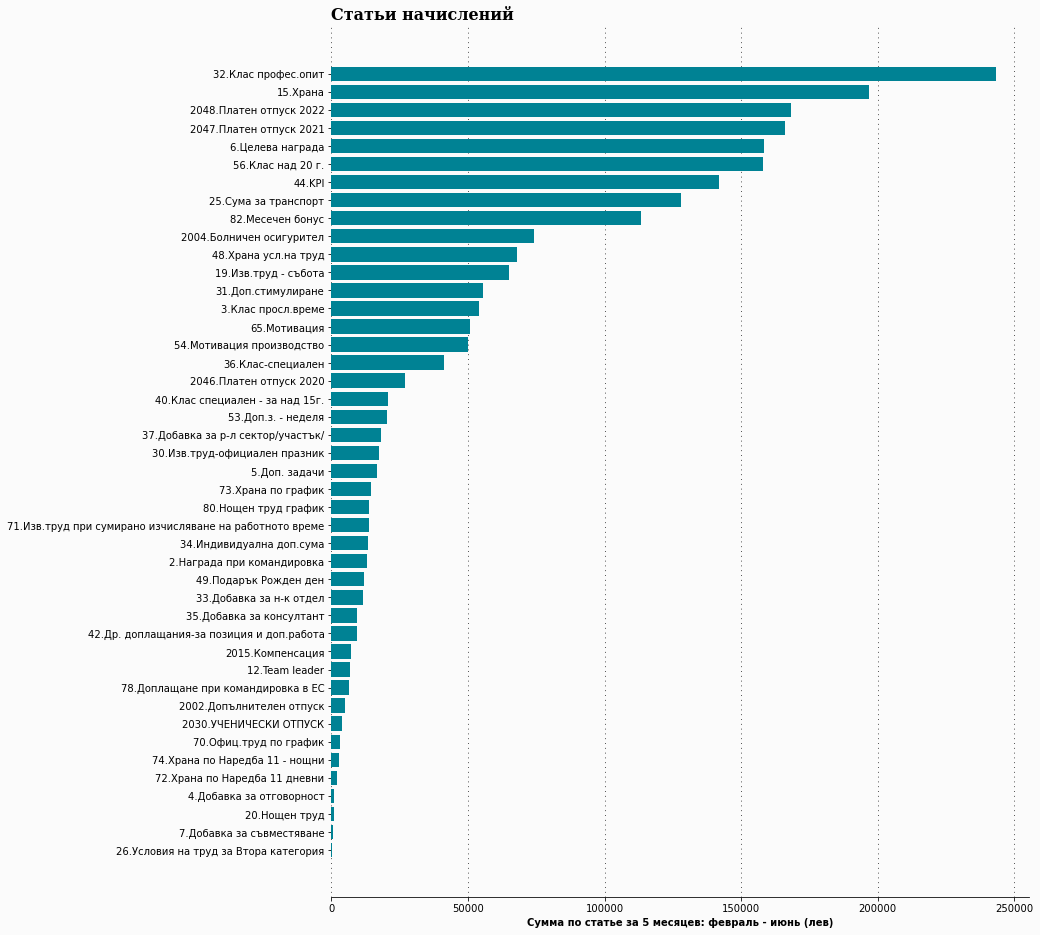

In [37]:
fig = plt.figure(figsize=(50,40)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data.keys()), list(sorted_data.values()), color=color_map, zorder=3)
ax0.text(-2, 46, 'Статьи начислений', fontsize=16, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('Сумма по статье за 5 месяцев: февраль - июнь (лев)',fontsize=10, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

## То же самое в долях (и суммах) для top-18

In [53]:
data1 = {}
for element in top_names:
    data1[element] = (df[element].sum()) / df['ФРЗ'].sum()
data2 = {}
for element in top_names:
    data2[element] = df[element].sum()

In [54]:
sorted_tuples1 = sorted(data1.items(), key=lambda item: item[1])
sorted_data1 = {k: v for k, v in sorted_tuples1}
sorted_tuples2 = sorted(data2.items(), key=lambda item: item[1])
sorted_data2 = {k: v for k, v in sorted_tuples2}

In [56]:
df['1.Основна заплата'].sum() / df['ФРЗ'].sum()

0.6052381011186216

In [89]:
res = 0
for element in top_names:
    res += df[element].sum()
res / df['ФРЗ'].sum()

0.3503058634553063

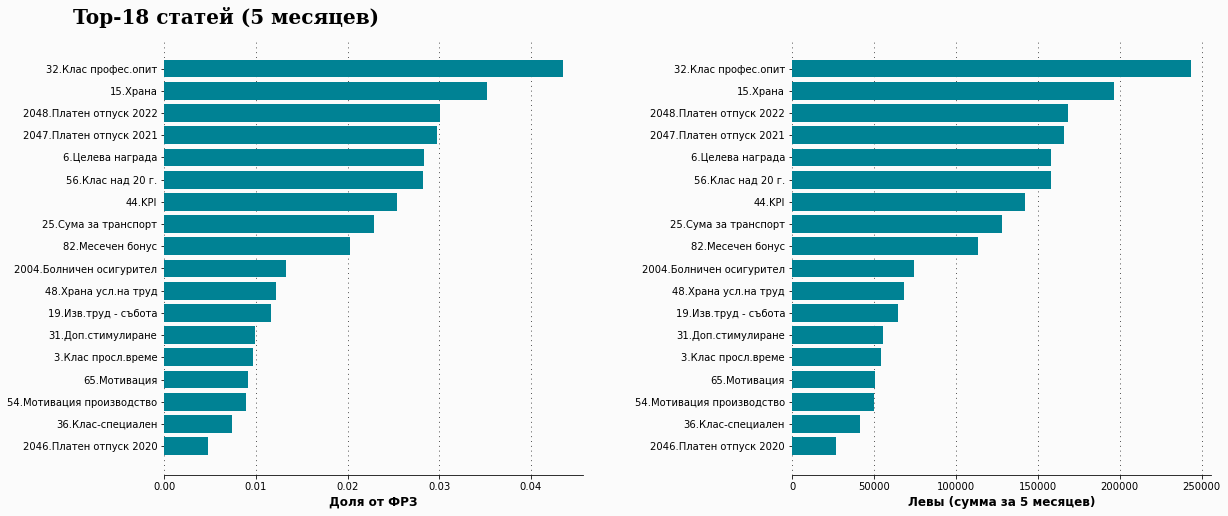

In [88]:
fig = plt.figure(figsize=(30,20)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data1.keys()), list(sorted_data1.values()), color=color_map, zorder=3)
ax1.barh(list(sorted_data2.keys()), list(sorted_data2.values()), color=color_map, zorder=3)
ax0.text(-0.01, 19, 'Top-18 статей (5 месяцев)', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('Доля от ФРЗ',fontsize=12, weight='bold')
ax1.set_xlabel('Левы (сумма за 5 месяцев)',fontsize=12, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

## Top - 18 статей в разрезе месяцев

In [91]:
df_feb = df.loc[df['Месяц'] == 'Февраль']
df_mar = df.loc[df['Месяц'] == 'Март']
df_apr = df.loc[df['Месяц'] == 'Апрель']
df_may = df.loc[df['Месяц'] == 'Май']
df_jun = df.loc[df['Месяц'] == 'Июнь']
data_feb = {}
for element in top_names:
    data_feb[element] = df_feb[element].sum()
data_mar = {}
for element in top_names:
    data_mar[element] = df_mar[element].sum()
data_apr = {}
for element in top_names:
    data_apr[element] = df_apr[element].sum()
data_may = {}
for element in top_names:
    data_may[element] = df_may[element].sum()
data_jun= {}
for element in top_names:
    data_jun[element] = df_jun[element].sum()
sorted_tuples_feb = sorted(data_feb.items(), key=lambda item: item[1])
sorted_data_feb = {k: v for k, v in sorted_tuples_feb}
sorted_tuples_mar = sorted(data_mar.items(), key=lambda item: item[1])
sorted_data_mar = {k: v for k, v in sorted_tuples_mar}
sorted_tuples_apr = sorted(data_apr.items(), key=lambda item: item[1])
sorted_data_apr = {k: v for k, v in sorted_tuples_apr}
sorted_tuples_may = sorted(data_may.items(), key=lambda item: item[1])
sorted_data_may = {k: v for k, v in sorted_tuples_may}
sorted_tuples_jun = sorted(data_jun.items(), key=lambda item: item[1])
sorted_data_jun = {k: v for k, v in sorted_tuples_jun}

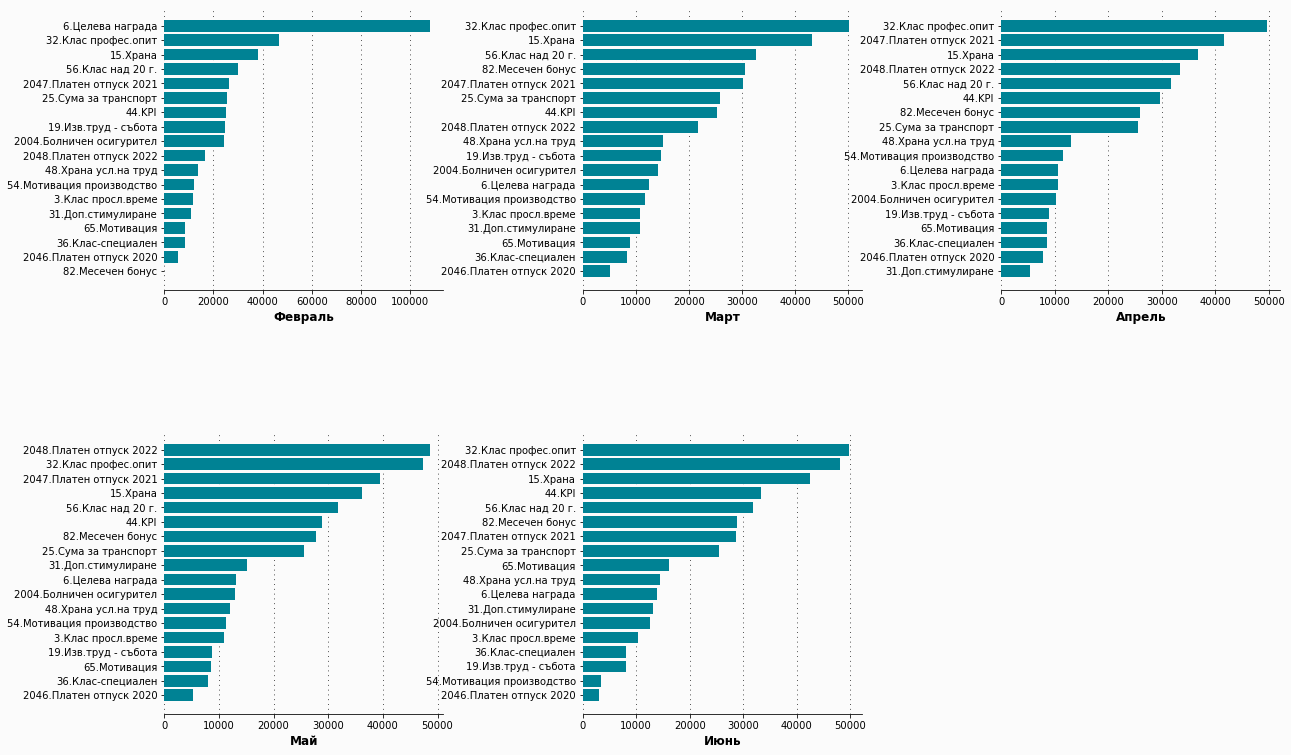

In [106]:
fig = plt.figure(figsize=(20,13)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color
ax4.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax2.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax3.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax4.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data_feb.keys()), list(sorted_data_feb.values()), color=color_map, zorder=3)
ax1.barh(list(sorted_data_mar.keys()), list(sorted_data_mar.values()), color=color_map, zorder=3)
ax2.barh(list(sorted_data_apr.keys()), list(sorted_data_apr.values()), color=color_map, zorder=3)
ax3.barh(list(sorted_data_may.keys()), list(sorted_data_may.values()), color=color_map, zorder=3)
ax4.barh(list(sorted_data_jun.keys()), list(sorted_data_jun.values()), color=color_map, zorder=3)
ax0.set_xlabel('Февраль',fontsize=12, weight='bold')
ax1.set_xlabel('Март',fontsize=12, weight='bold')
ax2.set_xlabel('Апрель',fontsize=12, weight='bold')
ax3.set_xlabel('Май',fontsize=12, weight='bold')
ax4.set_xlabel('Июнь',fontsize=12, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)

## ФРЗ в разрезе должностей

In [110]:
workers = df['Должность'].unique()

In [111]:
data_w = {}
for element in workers:
    df_temp = df.loc[df['Должность'] == element]
    data_w[element] = df_temp['ФРЗ'].sum()

In [112]:
sorted_tuples_w = sorted(data_w.items(), key=lambda item: item[1])
sorted_data_w = {k: v for k, v in sorted_tuples_w}

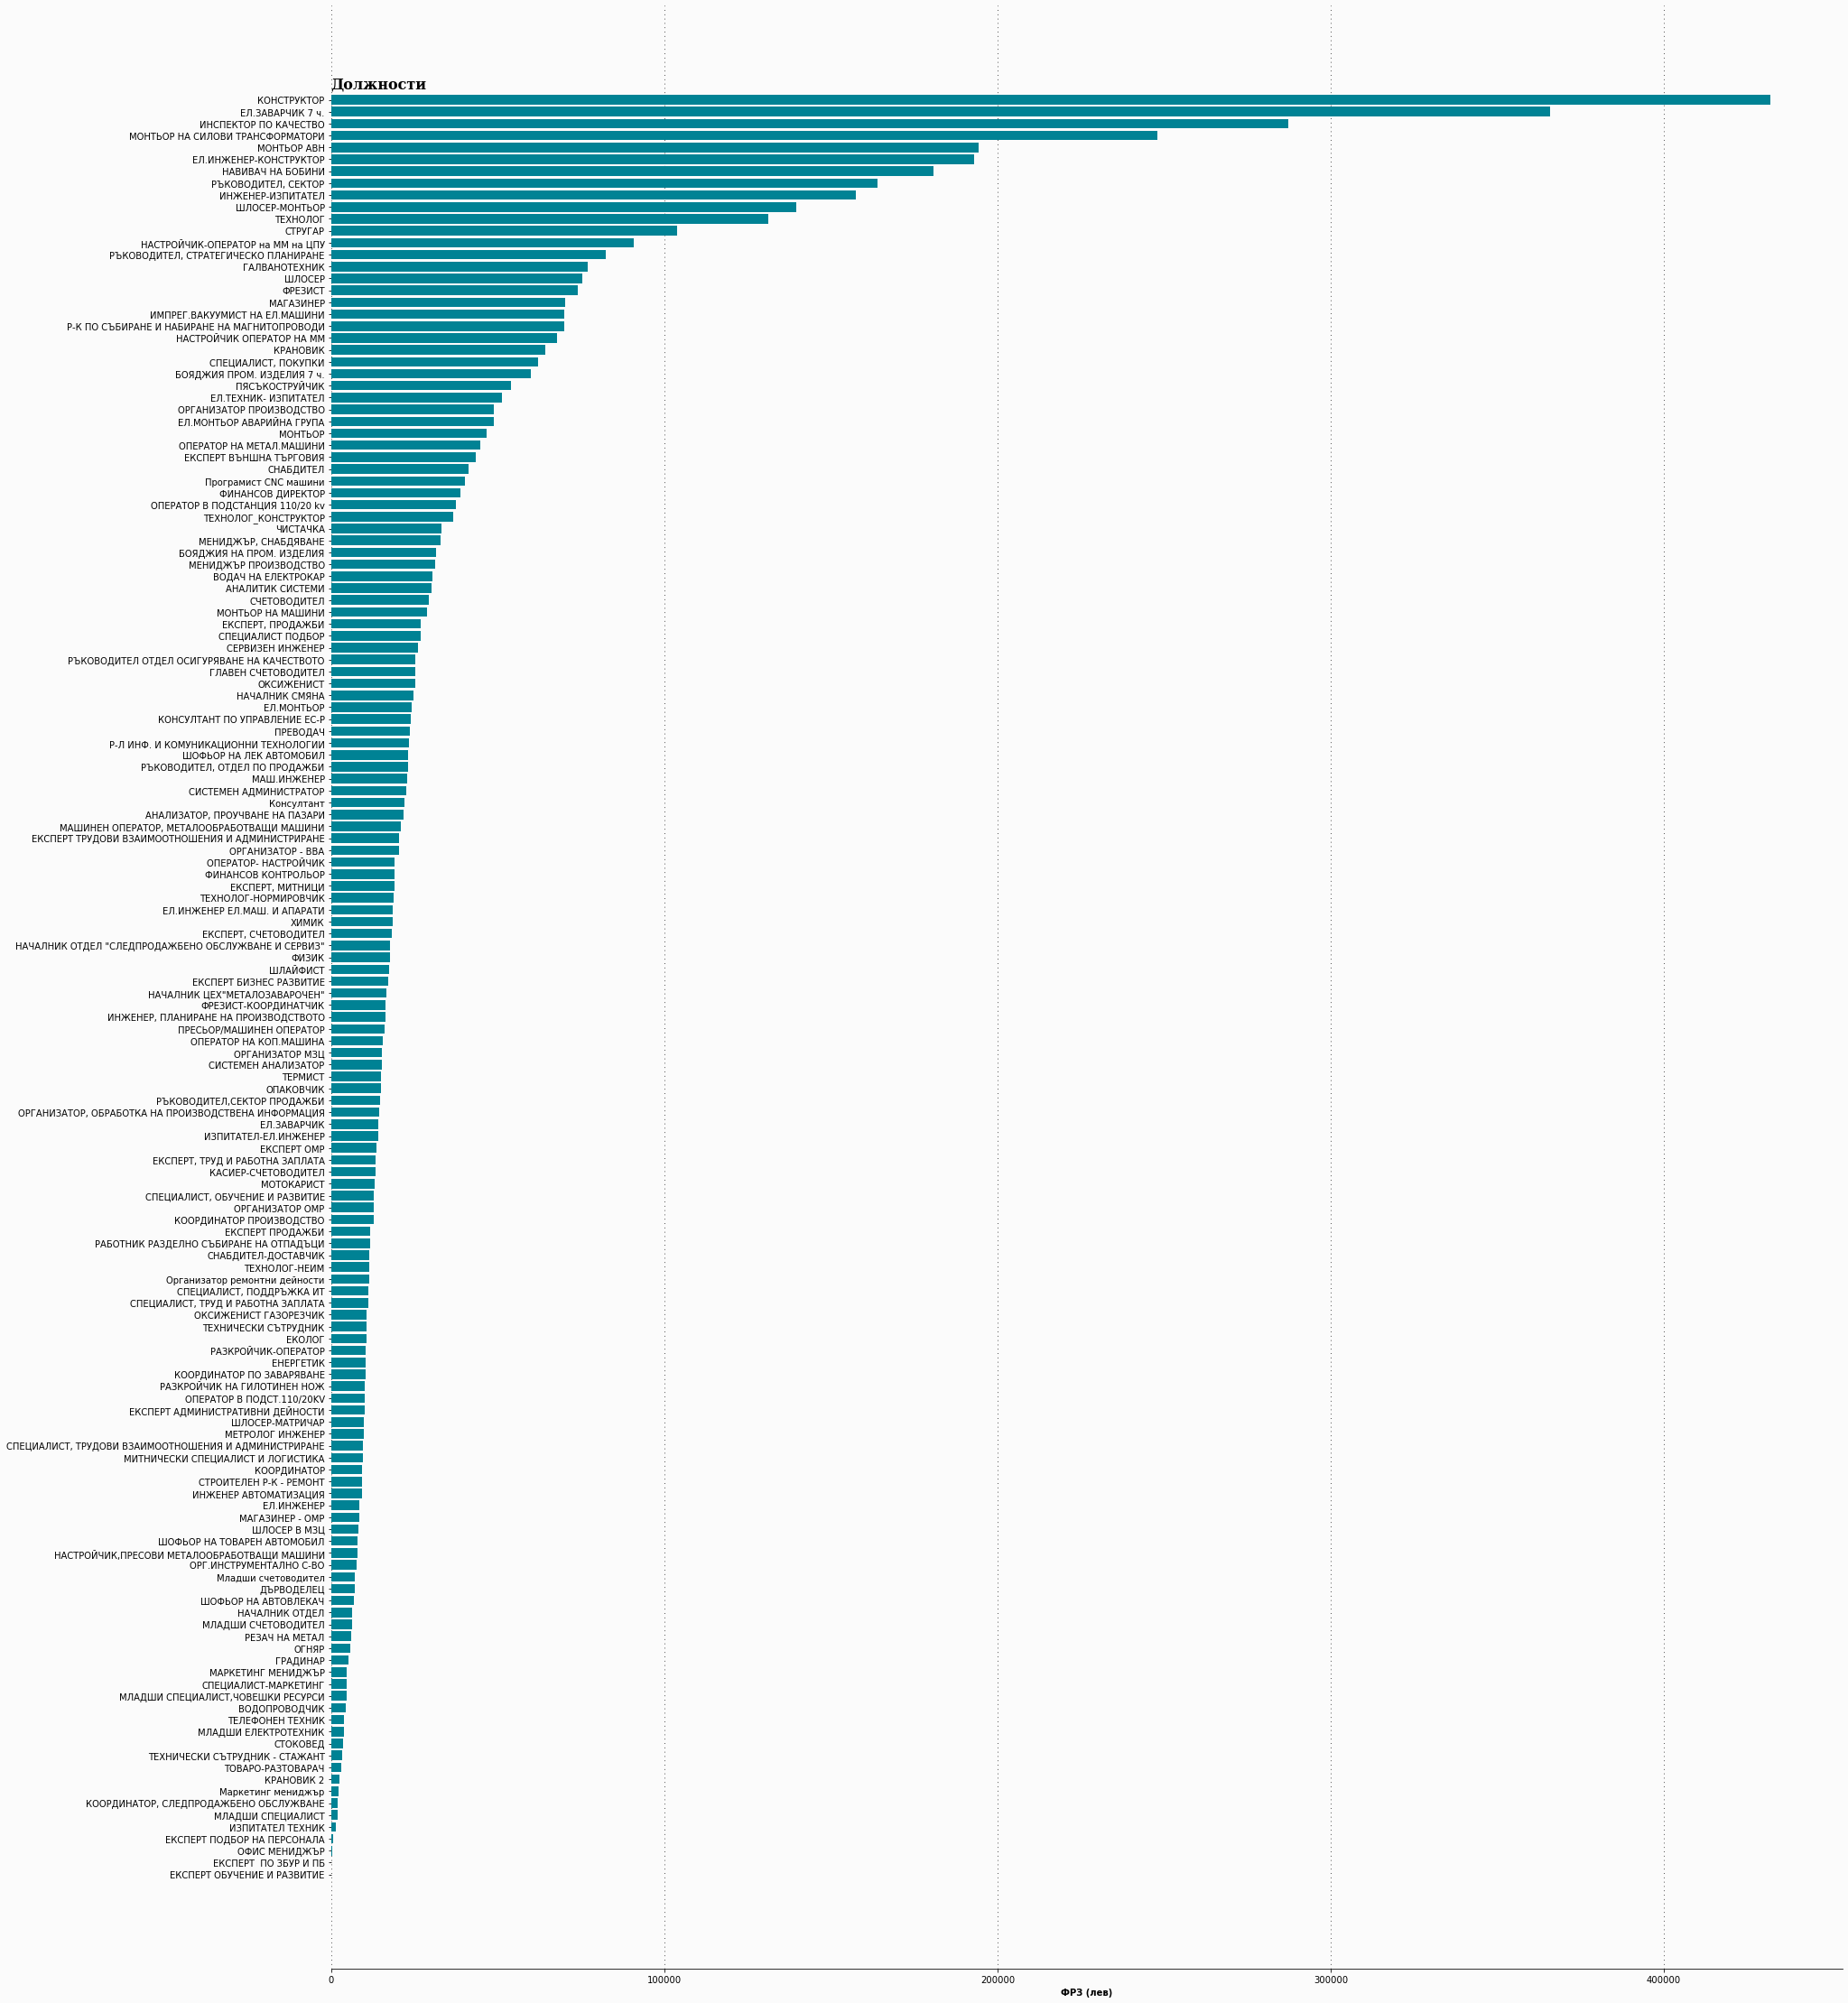

In [119]:
fig = plt.figure(figsize=(120,100)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data_w.keys()), list(sorted_data_w.values()), color=color_map, zorder=3)
ax0.text(-2, 150, 'Должности', fontsize=16, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('ФРЗ (лев)',fontsize=10, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

### Top-18 статей в разрезе должностей

In [120]:
data_w1 = {}
for element in workers:
    df_temp = df.loc[df['Должность'] == element]
    res = 0
    for elem in top_names:
        res += df_temp[elem].sum()
    data_w1[element] = res

In [121]:
sorted_tuples_w1 = sorted(data_w1.items(), key=lambda item: item[1])
sorted_data_w1 = {k: v for k, v in sorted_tuples_w1}

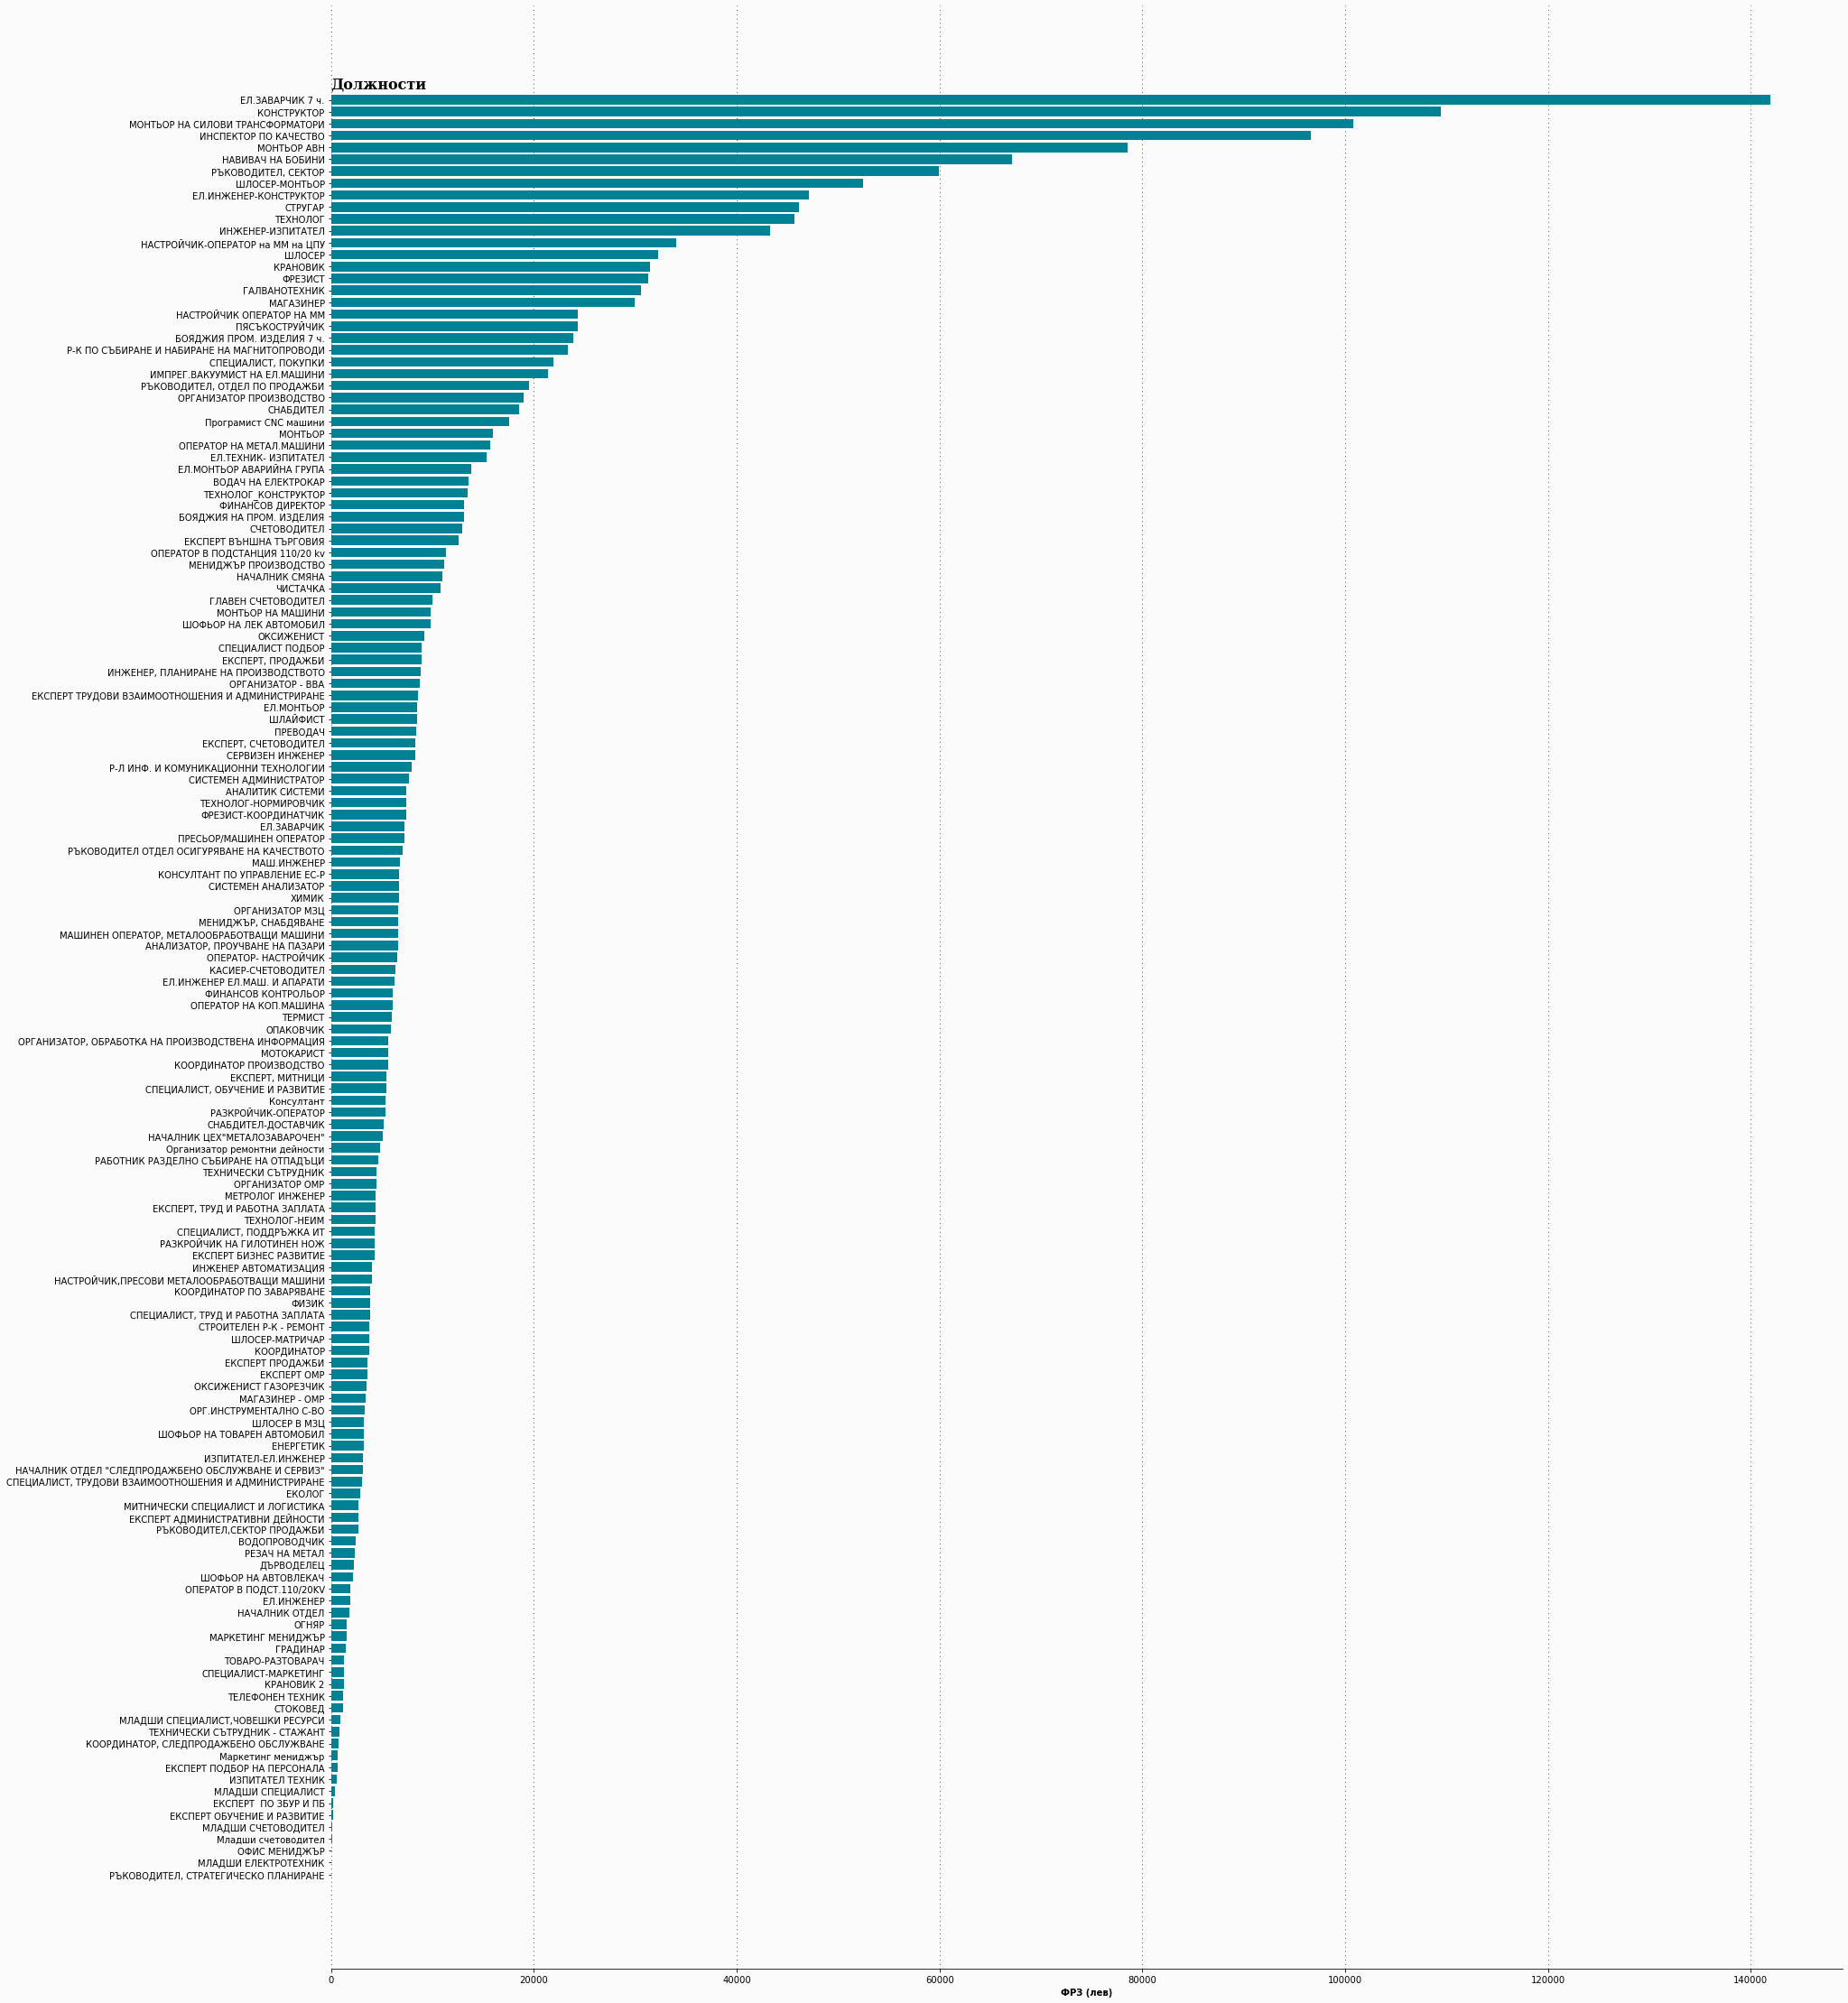

In [122]:
fig = plt.figure(figsize=(120,100)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data_w1.keys()), list(sorted_data_w1.values()), color=color_map, zorder=3)
ax0.text(-2, 150, 'Должности', fontsize=16, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('ФРЗ (лев)',fontsize=10, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

## Доли

In [125]:
data_w2 = {}
for key in data_w.keys():
    data_w2[key] = data_w1[key] / data_w[key]

In [126]:
sorted_tuples_w2 = sorted(data_w2.items(), key=lambda item: item[1])
sorted_data_w2 = {k: v for k, v in sorted_tuples_w2}

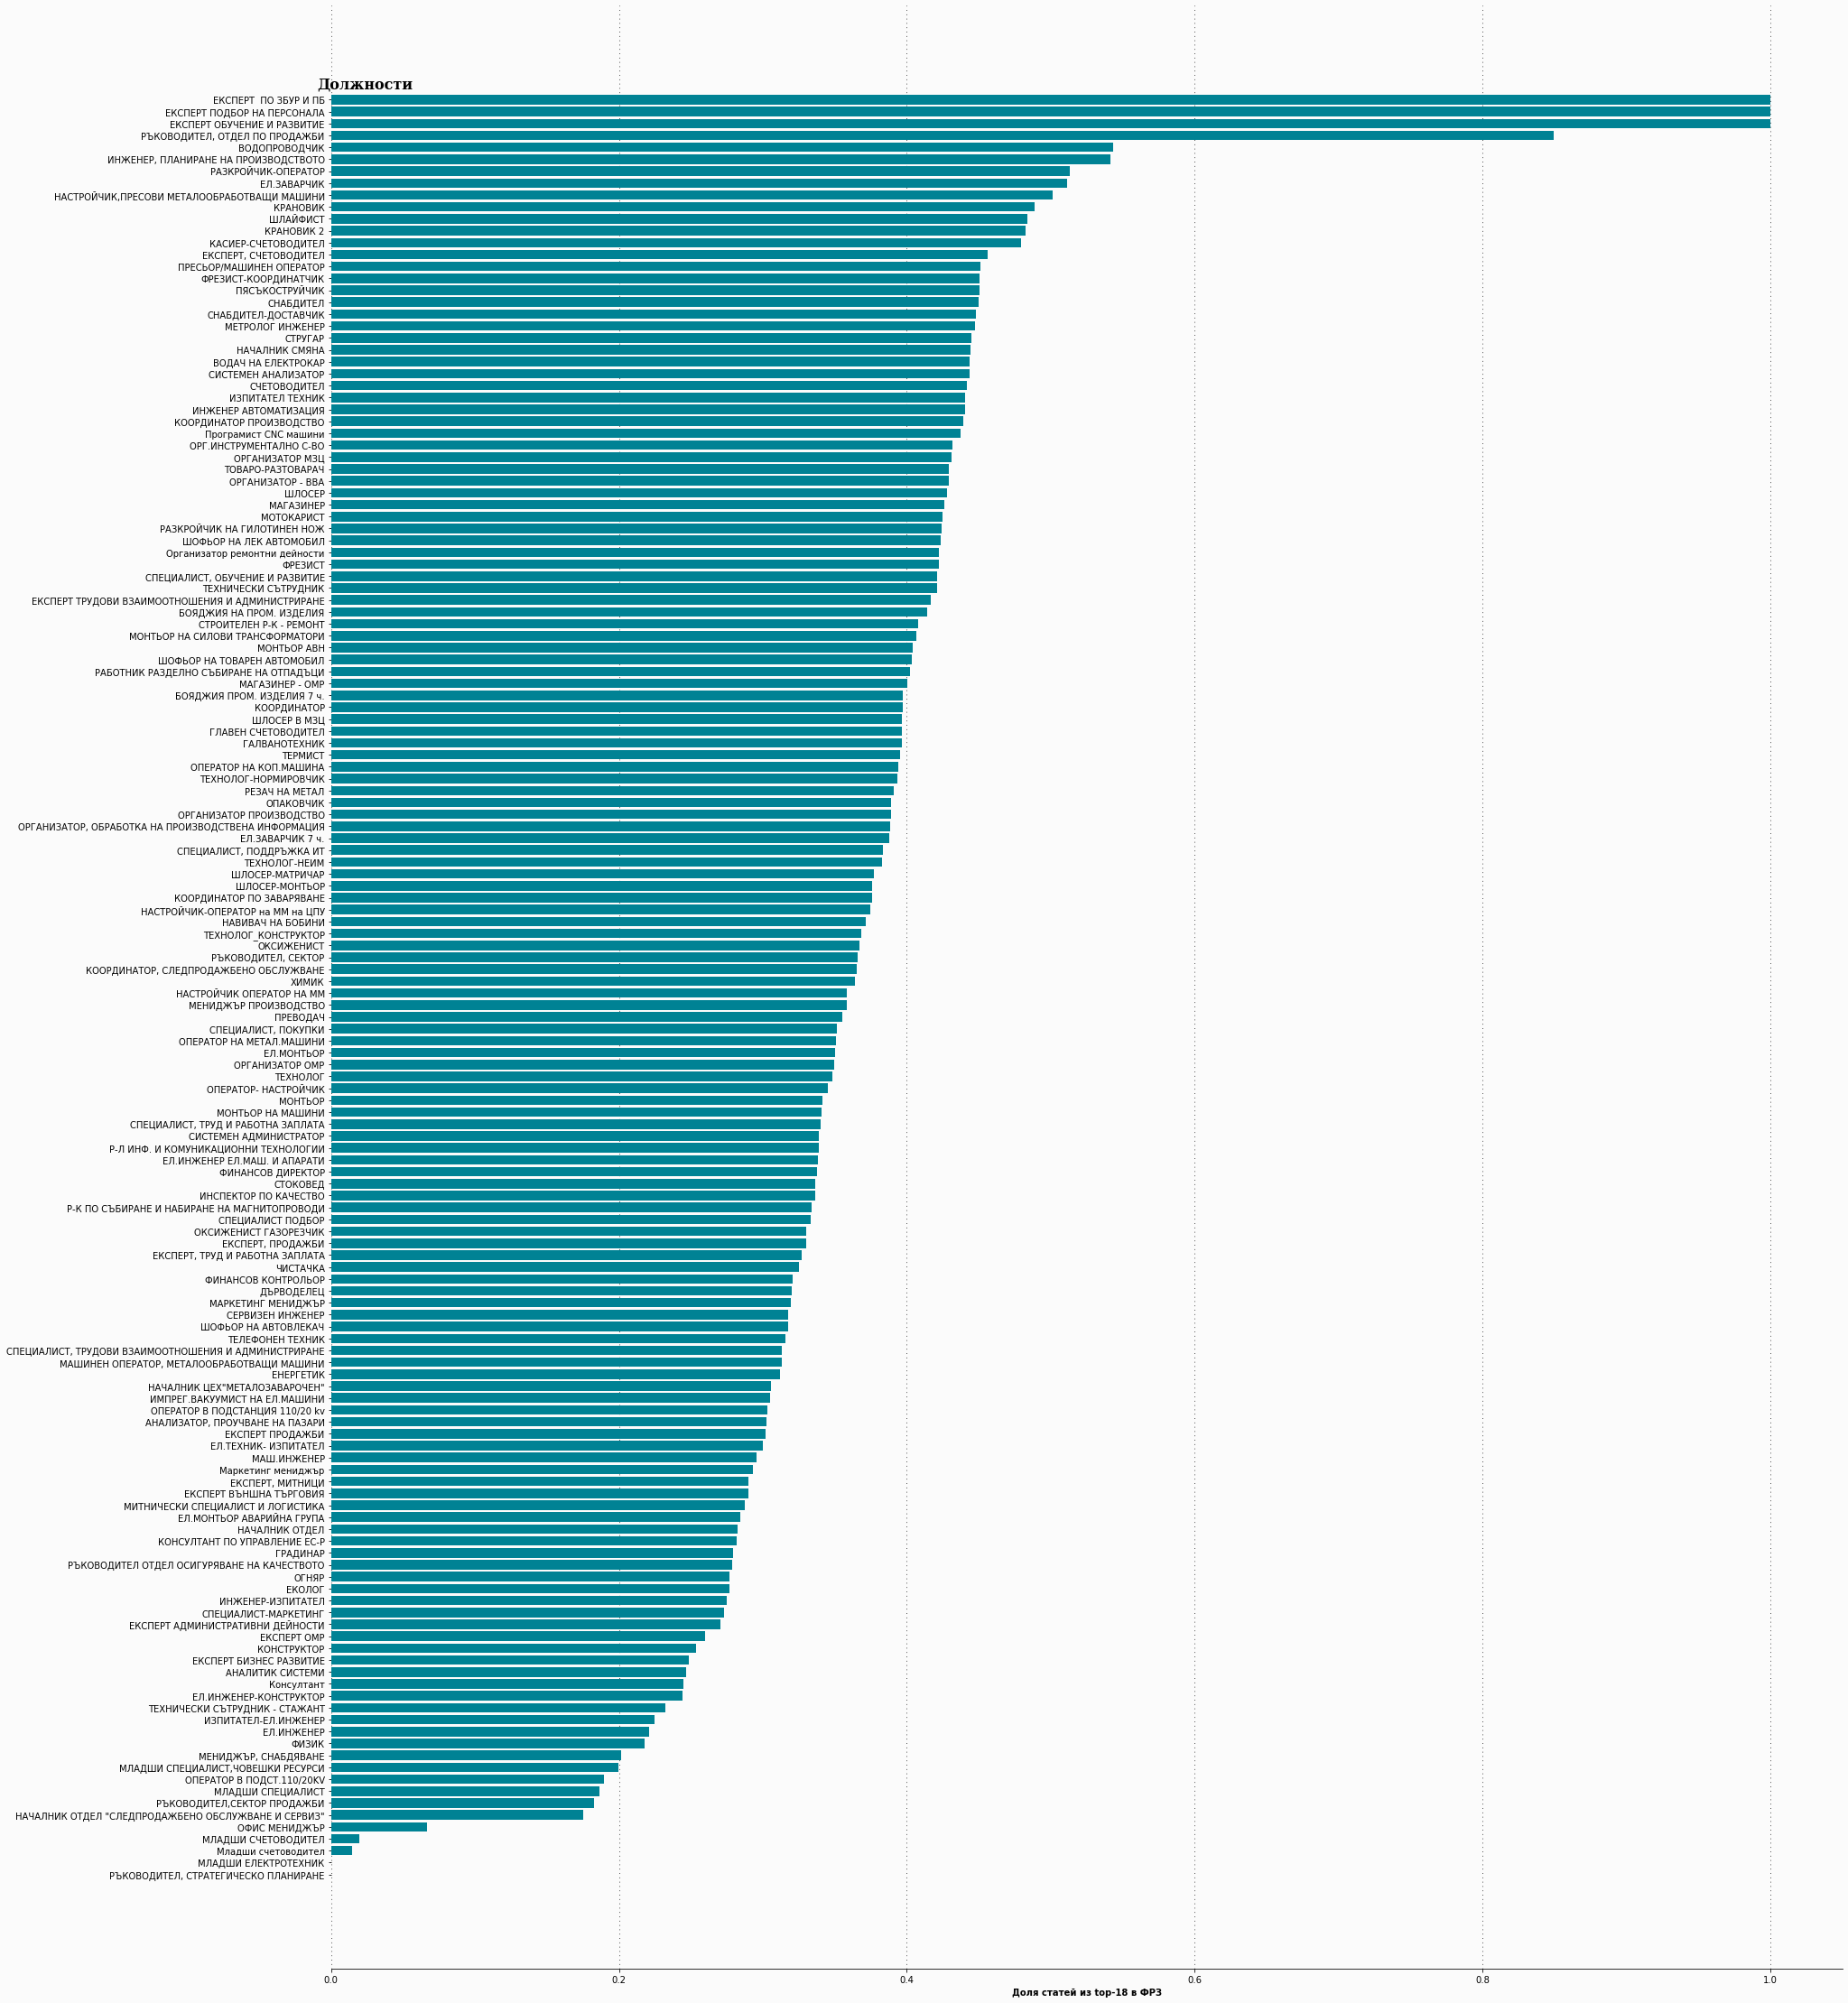

In [141]:
fig = plt.figure(figsize=(120,100)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data_w2.keys()), list(sorted_data_w2.values()), color=color_map, zorder=3)
ax0.text(-0.01, 150, 'Должности', fontsize=16, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('Доля статей из top-18 в ФРЗ',fontsize=10, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

## Top-16 Должностей по ФРЗ

In [131]:
top_workers = [
    'ЕЛ.ЗАВАРЧИК 7 ч.',
    'СТРУГАР',
    'НАВИВАЧ НА БОБИНИ',
    'МОНТЬОР',
    'МОНТЬОР НА СИЛОВИ ТРАНСФОРМАТОРИ',
    'КОНСТРУКТОР',
    'ШЛОСЕР',
    'ИНСПЕКТОР ПО КАЧЕСТВО',
    'МОНТЬОР АВН',
    'РЪКОВОДИТЕЛ, СЕКТОР',
    'НАСТРОЙЧИК ОПЕРАТОР НА ММ',
    'ШЛОСЕР-МОНТЬОР',
    'СТРУГАР',
    'ЕЛ.ИНЖЕНЕР-КОНСТРУКТОР',
    'ТЕХНОЛОГ',
    'ИНЖЕНЕР-ИЗПИТАТЕЛ'
]

In [133]:
data_w1_top = {}
for element in top_workers:
    df_temp = df.loc[df['Должность'] == element]
    res = 0
    for elem in top_names:
        res += df_temp[elem].sum()
    data_w1_top[element] = res

In [134]:
sorted_tuples_w1_top = sorted(data_w1_top.items(), key=lambda item: item[1])
sorted_data_w1_top = {k: v for k, v in sorted_tuples_w1_top}

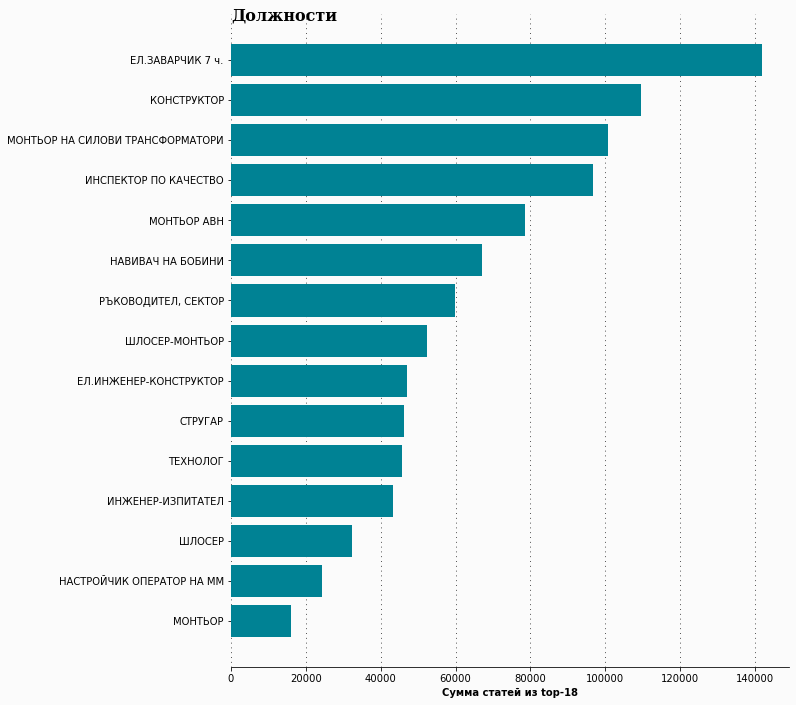

In [142]:
fig = plt.figure(figsize=(40,30)) # create figure
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
color_map = ["#008294" for _ in range(13)]
color_map[11] = "#008294"
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax0.grid(color='black', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.barh(list(sorted_data_w1_top.keys()), list(sorted_data_w1_top.values()), color=color_map, zorder=3)
ax0.text(-2, 15, 'Должности', fontsize=16, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('Сумма статей из top-18',fontsize=10, weight='bold')
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)